In [3]:
%reset -f

import pandas            as pd
import numpy             as np
import statsmodels.api   as sm
import matplotlib.pyplot as plt

# load data into Stata

In [4]:
df = pd.read_stata('Q2.dta')

# list all variable names in the dataset

In [5]:
list(df.columns)

['gpa', 'act']

# list all the observations in your dataset

In [6]:
df

,gpa,act
0,2.8,21
1,3.4,24
2,3.0,26
3,3.5,27
4,3.6,29
5,3.0,25
6,2.7,25
7,3.7,30


# compute summary statistics

In [7]:
df.describe()

,gpa,act
count,8.000000,8.000000
mean,3.212500,25.875000
std,0.383359,2.850439
min,2.700000,21.000000
25%,2.950000,24.750000
50%,3.200000,25.500000
75%,3.525000,27.500000
max,3.700000,30.000000


# regression

## set X variable

In [8]:
X = df['act']

In [9]:
X

0    21
1    24
2    26
3    27
4    29
5    25
6    25
7    30
Name: act, dtype: int8

## set Y variable

In [10]:
Y = df['gpa']

In [11]:
Y

0    2.8
1    3.4
2    3.0
3    3.5
4    3.6
5    3.0
6    2.7
7    3.7
Name: gpa, dtype: float32

# add intercept into your regression

In [12]:
X = sm.add_constant(X)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
X

,const,act
0,1.0,21
1,1.0,24
2,1.0,26
3,1.0,27
4,1.0,29
5,1.0,25
6,1.0,25
7,1.0,30


# compute OLS

In [14]:
reg1 = sm.OLS(Y, X)

result1 = reg1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     8.199
Date:                Mon, 13 Sep 2021   Prob (F-statistic):             0.0287
Time:                        05:06:20   Log-Likelihood:                0.29842
No. Observations:                   8   AIC:                             3.403
Df Residuals:                       6   BIC:                             3.562
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5681      0.928      0.612      0.5

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# plot data points and regression line

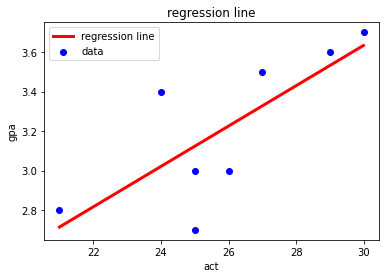

In [15]:
x_val = np.arange(np.min(df['act']), np.max(df['act']), 0.01)

y_val = result1.params[0] + result1.params[1] * x_val


fig = plt.figure()

plt.plot(x_val, y_val, color='red', lw=3, label="regression line")
plt.scatter(df['act'], df['gpa'], color="blue", label="data")

plt.legend()
plt.xlabel('act')
plt.ylabel('gpa')
plt.title('regression line')

plt.show()

# compute predicted value

In [25]:
Y_pred = result1.predict()
df['Y_pred'] = pd.Series(Y_pred)

In [26]:
df

,gpa,act,Y_pred
0,2.8,21,2.714286
1,3.4,24,3.020879
2,3.0,26,3.225275
3,3.5,27,3.327473
4,3.6,29,3.531868
5,3.0,25,3.123077
6,2.7,25,3.123077
7,3.7,30,3.634066


# compute prediction residual

In [27]:
df['residual'] = df['gpa'] - df['Y_pred']

In [28]:
df

,gpa,act,Y_pred,residual
0,2.8,21,2.714286,0.085714
1,3.4,24,3.020879,0.379121
2,3.0,26,3.225275,-0.225275
3,3.5,27,3.327473,0.172527
4,3.6,29,3.531868,0.068132
5,3.0,25,3.123077,-0.123077
6,2.7,25,3.123077,-0.423077
7,3.7,30,3.634066,0.065934


# compute the summary statistics of prediction residual

In [33]:
sum_df = df['residual'].describe()
sum_df.round(4)

count    8.0000
mean    -0.0000
std      0.2492
min     -0.4231
25%     -0.1486
50%      0.0670
75%      0.1074
max      0.3791
Name: residual, dtype: float64

# predict for a given value of X

## 1 here stand for the intercept

In [37]:
result1.predict([1, 20])

array([2.61208793])

# How much of the variation in GPA for these eight students is explained by ACT?

## that's just R2

In [42]:
result1.rsquared

0.577423775649966

# produce HTML output

In [43]:
!jupyter nbconvert --to html Q2_Python.ipynb

[NbConvertApp] Converting notebook Q2_Python.ipynb to html
[NbConvertApp] Writing 608381 bytes to Q2_Python.html
